In [311]:
import pandas as pd
import numpy as np
from keras.layers import LSTM

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model

from keras.utils.generic_utils import get_custom_objects
from keras.layers.core import Activation


In [312]:
exchangerate_data = pd.read_csv('USD_CHFMonthly99-17.csv')
exchangerate_data["Date"] = pd.to_datetime(exchangerate_data["Date"])# 1 USD = X CHF
ind_exchangerate_data = exchangerate_data.set_index(["Date"], drop=True)

In [313]:
ind_exchangerate_data.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2017-12-01,0.9743,0.9836,0.9979,0.9733,NaN,-0.93%
2017-11-01,0.9834,0.9976,1.0038,0.9778,NaN,-1.41%
2017-10-01,0.9975,0.9682,1.0038,0.9680,NaN,3.05%
2017-09-01,0.9680,0.9586,0.9771,0.9420,NaN,0.99%
2017-08-01,0.9585,0.9669,0.9773,0.9430,NaN,-0.82%


In [5]:
data_frame = ind_exchangerate_data.sort_index(axis=1 ,ascending=True)
data_frame = data_frame.iloc[::-1]
data_frame.head()
#data are reversed

,Change %,High,Low,Open,Price,Vol.
Date,,,,,,
1999-01-01,2.80%,1.4220,1.3396,1.3615,1.4160,NaN
1999-02-01,2.14%,1.4599,1.4029,1.4143,1.4463,NaN
1999-03-01,2.50%,1.4938,1.4435,1.4491,1.4825,NaN
1999-04-01,2.90%,1.5275,1.4646,1.4821,1.5255,NaN
1999-05-01,0.11%,1.5318,1.4836,1.5225,1.5272,NaN


               Low
Date              
1999-01-01  1.3396
1999-02-01  1.4029
1999-03-01  1.4435
1999-04-01  1.4646
1999-05-01  1.4836
...            ...
2017-08-01  0.9430
2017-09-01  0.9420
2017-10-01  0.9680
2017-11-01  0.9778
2017-12-01  0.9733

[228 rows x 1 columns]


<AxesSubplot: xlabel='Date'>

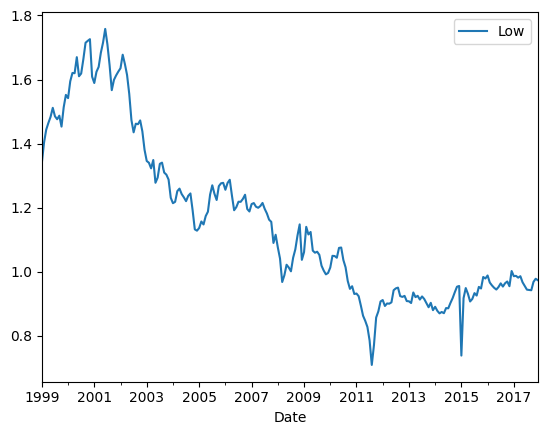

In [309]:
df = data_frame[["Low"]]
print(df)
df.plot()

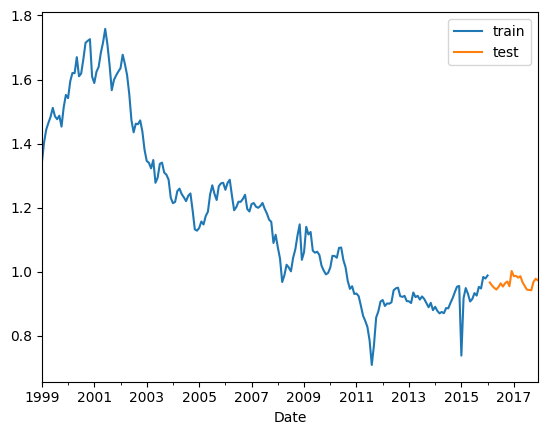

In [310]:
split_date = pd.Timestamp('01-12-2016')

train = df.loc[:split_date]
test = df.loc[split_date:]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

MinMaxScaler()
<class 'numpy.ndarray'>


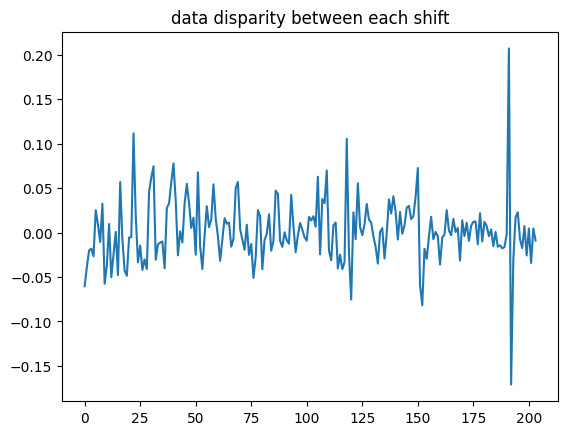

In [314]:
#Data transformation
sc = MinMaxScaler()
print(sc)
train_sc = sc.fit_transform(train)
print(type(train_sc[1]))
test_sc = sc.transform(test)
#ANN

#Daily forecast change the number of day for it with changing the number in []
X_train = train_sc[:-1]
y_train = train_sc[1:]
plt.plot(X_train-y_train)
plt.title("data disparity between each shift")
X_test = test_sc[:-1]
y_test = test_sc[1:]
# a=[1,5,9,11,2,66] => a[:-1] = [1, 5, 9, 11, 2] input            
# a=[1,5,9,11,2,66] => a[1:] = [5, 9, 11, 2, 66] target 

In [9]:
def complie(dataloader, opti):
    epoch_loss = 0
    if is_training:
        model.train()
    else:
        model.eval()
    for idx, (x, y) in enumerate(dataloader):
        if is_training:
            optimizer.zero_grad()
        batchsize = x.shape[0]
        x = x.to(config["train"]["device"])
        y = y.to(config["train"]["device"])
        loss = criterion(out.contiguous(), y.contiguous())
        out = model(x)
        if is_training:
            loss.backward()
            optimizer.step()
        epoch_loss += (loss.detach().item() / batchsize)
    lr = scheduler.get_last_lr()[0]
    return epoch_loss, lr
def fit(a,b,c,d,e,f,g):
    compute_loss_source(a,b,e)
    compute_loss_target(b,c,g)
    
def compute_loss_source(s_labels, l_source_w, l_source_s):
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    w_loss = loss(s_labels, l_source_w)
    s_loss = loss(s_labels, l_source_s)
    return w_loss + s_loss
def compute_loss_target(t_pseudo_labels_w, l_target_s, shift):
    loss_func = keras.losses.CategoricalCrossentropy(from_logits=True, reduction="none")
    target_pseudo_labels_w = tf.stop_gradient(t_pseudo_labels_w)
    target_loss = loss_func(t_pseudo_labels_w, l_target_s)
    mask = tf.cast(shift, t_loss.dtype)
    target_loss *= shift
    return tf.reduce_mean(target_loss, 0)

In [10]:
#private activation function 
def custom_activation(x):
    return (2/(1 + Ker.exp(-2*x))-1)
     
get_custom_objects().update({'custom_activation': Activation(custom_activation)})

In [11]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

ANN

In [280]:
K.clear_session()

model = Sequential()
model.add(Dense(3000, input_dim=1, activation='relu'))
#model.add(Dense(3, input_dim=1, activation='relu'))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
early = EarlyStopping(monitor='loss', patience=2, verbose=1)
#model.compile(loss='binary_crossentropy', optimizer='adam')
history = model.fit(X_train, y_train, epochs= 4, batch_size= 1,verbose = 1, callbacks= [early], shuffle= False)
#Epoch: One pass through all of the rows in the training dataset
#Batch: One or more samples considered by the model within an epoch before weights are updated


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3000)              6000      
                                                                 
 dense_1 (Dense)             (None, 1)                 3001      
                                                                 
Total params: 9,001
Trainable params: 9,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
 37/180 [=====>........................] - ETA: 0s - loss: 0.0543

2022-11-27 17:40:08.630715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


180/180 [==============================] - 1s 3ms/step - loss: 0.0125
Epoch 2/4
180/180 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 3/4
180/180 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 4/4
180/180 [==============================] - 0s 3ms/step - loss: 0.0029


In [281]:
y_pred_test_ann = model.predict(X_test)
y_train_pred_ann = model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_ann)))
r2_train = r2_score(y_train, y_train_pred_ann)
print("R2 score on the Train set:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("R2 score on the Test set :\t{:0.3f}".format(r2_score(y_test, y_pred_test_ann)))
r2_test = r2_score(y_test, y_pred_test_ann)
print("R2 score on the Test set:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

6/6 [==============================] - 0s 3ms/step
The R2 score on the Train set is:	0.601
R2 score on the Train set:	0.598

R2 score on the Test set :	0.275
R2 score on the Test set:	0.259


2022-11-27 17:40:11.424852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [282]:
model.save('ANN_NonShift.h5')

LTSM

In [315]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [316]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(10, input_shape=(1, X_train.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=4, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

Epoch 1/4


2022-12-11 17:43:09.578394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


204/204 [==============================] - 2s 8ms/step - loss: 0.0545
Epoch 2/4
204/204 [==============================] - 2s 7ms/step - loss: 0.0102
Epoch 3/4
204/204 [==============================] - 2s 8ms/step - loss: 0.0052
Epoch 4/4
1/7 [===>..........................] - ETA: 0s

2022-12-11 17:43:16.229502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 41ms/step
The R2 score on the Train set is:	0.913
The Adjusted R2 score on the Train set is:	0.913

The R2 score on the Test set is:	0.256
The Adjusted R2 score on the Test set is:	0.219


In [284]:
model_lstm.save('LSTM_NonShift.h5')

Résultat

In [290]:
model_ann = load_model('ANN_NonShift.h5')
model_lstm = load_model('LSTM_NonShift.h5')

In [291]:
score_ann= model_ann.evaluate(X_test, y_test, batch_size=1)
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

47/47 [==============================] - 0s 2ms/step - loss: 0.0013


2022-11-27 17:41:08.864813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-27 17:41:09.027751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 0s 4ms/step - loss: 0.0016


In [317]:
print('ANN: %f'%score_ann)
print('LSTM: %f'%score_lstm)#if predictions are totally off => higher number. If they're pretty good => lower number
y_pred_test_ANN = model_ann.predict(X_test)

ANN: 0.001338
LSTM: 0.001575
1/1 [==============================] - 0s 61ms/step


2022-12-11 17:43:31.740166: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [318]:
y_pred_test_ANN = model_ann.predict(X_test)
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

1/1 [==============================] - 0s 13ms/step


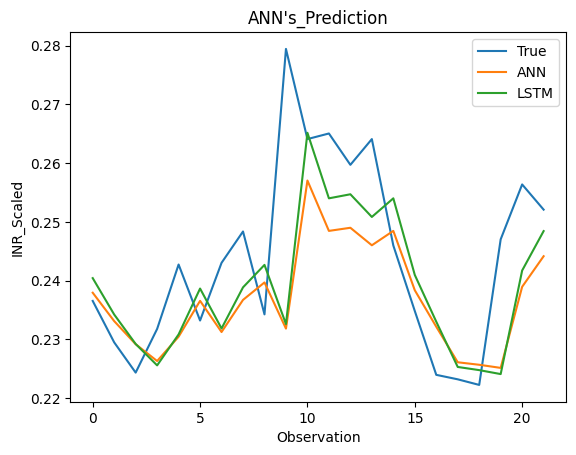

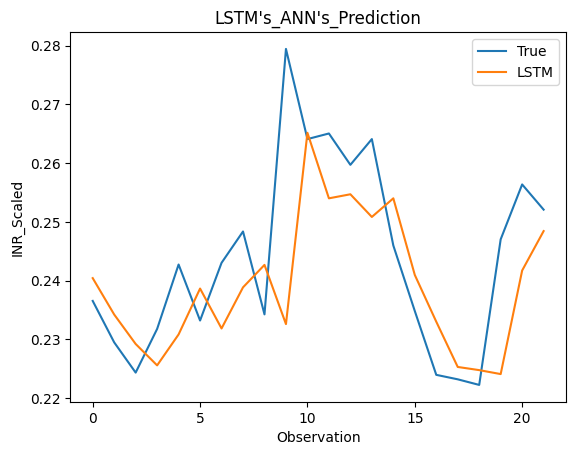

In [319]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_ANN, label='ANN')
plt.plot(y_pred_test_LSTM, label='LSTM')

plt.title("ANN's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_ANN's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

In [320]:
#implement Adjusted R2 is a corrected goodness-of-fit (model accuracy) measure for linear models
# new activation find the best 
#new architecture https://en.wikipedia.org/wiki/Long_short-term_memory LTSM
#implement a saver in tab to show data 
# more or less neurones 
#improve the plot end of the month exchange rate 1 month forecsat 

#random walk is the benchmark put monthly data and compare ML


In [321]:
from random import seed
from random import random
from matplotlib import pyplot
seed(5)
random_walk = list()
random_walk.append(0.16)
for i in range(1, 83):
	movement = -0.01 if random() < 0.5 else 0.01
	value = random_walk[i-1] + movement
	random_walk.append(value)


In [322]:
import math
MSE = np.square(np.subtract(y_test,y_pred_test_ANN)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square ErrorANN:\n")
print(RMSE*100)
MSE = np.square(np.subtract(y_test,y_pred_test_LSTM)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square ErrorLTSM:\n")
print(RMSE*100)

MSE = np.square(np.subtract(y_test,random_walk)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error Random Walk:\n")
print(RMSE*100)


Root Mean Square ErrorANN:

1.4329015631977673
Root Mean Square ErrorLTSM:

1.3521823236838737
Root Mean Square Error Random Walk:

5.793863356822723


In [323]:
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
list_of_numbers = list(range(1, len(y_test)+1))
df = pd.DataFrame(y_test, columns = ['Index Value'])#True
df2 = pd.DataFrame(y_pred_test_ANN, columns = ['Index Value'])#ANN
df3 = pd.DataFrame(y_pred_test_LSTM, columns = ['Index Value'])#LSTM
df4 = pd.DataFrame(random_walk, columns = ['Index Value'])

#df = df.assign(Months=list_of_numbers)
#df2 = df2.assign(Months=list_of_numbers)
#fig = px.line(df,x="Months", y="Index Value")

In [324]:
# import graph_objects from plotly package
import plotly.graph_objects as go
 
# import make_subplots function from plotly.subplots
# to make grid of plots
from plotly.subplots import make_subplots
 
# use specs parameter in make_subplots function
# to create secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
 
# plot a scatter chart by specifying the x and y values
# Use add_trace function to specify secondary_y axes.
fig.add_trace(
    go.Scatter(x=list_of_numbers, y=df['Index Value'], name="True"),
    secondary_y=False)
 
# Use add_trace function and specify secondary_y axes = True.
fig.add_trace(
    go.Scatter(x=list_of_numbers, y=df2['Index Value'], name="ANN"),
    secondary_y=False,)
fig.add_trace(
    go.Scatter(x=list_of_numbers, y=df3['Index Value'], name="LSTM"),
    secondary_y=False,)
fig.add_trace(
    go.Scatter(x=list_of_numbers, y=df4['Index Value'], name="Random walk"),
    secondary_y=False,)
 
# Adding title text to the figure
fig.update_layout(
    title_text="                       Predictions with 100 neurons"
)
 
# Naming x-axis
fig.update_xaxes(title_text="Months")
fig.update_yaxes(title_text="Index value")

 
# Naming y-axes
#fig.update_yaxes(title_text="<b>Main</b> Y - axis ", secondary_y=False)
#fig.update_yaxes(title_text="<b>secondary</b> Y - axis ", secondary_y=True)